# 11. Procesamiento de Tasa Múltiple

Hasta este punto se han discutido diferentes técnicas de procesamiento de señales en las que se asume una única frecuencia de muestreo. Además, gran parte de las técnicas presentadas se basan en filtrado digital o sistemas LTI, con los cuales se modifica la ganancia o se suprimen componentes de frecuencia de la señal de entrada, pero no se generan nuevas componentes de frecuencia. En ese capítulo se estudiarán diferentes técnicas de procesamiento de señales que hacen uso de múltiples tasas de muestreo, y por ende, en el procesamiento de la señal, es posible generar componentes de frecuencia inexistentes en la señal de entrada. 

Estas técnicas tienen una gran variedad de aplicaciones, entre las cuales se destacan: cambio de la frecuencia de muestreo por software; construcción de filtros de banda angosta; construcción de sistemas de comunicación tales como moduladores, demoduladores y codificadores, usados en radio definida por software (SDR); implementación de técnicas de acceso al medio como espectro esparcido (_spread spectrum_); compresión con pérdidas de señales de audio e imágenes, tales como los algoritmos MPEG y JPEG2000. 

Para llevar a cabo dicho procesamiento, se introducen en este capítulo dos operaciones básicas de procesamiento de señales, el **diezmado** y la **interpolación** que permiten disminuir y aumentar, respectivamente, la frecuencia de muestreo de una señal, lo cual conlleva a un efecto de expansión y compresión del espectro, y son la base para la construcción de sistemas más complejos.

## 11.1 Diezmado

En el tiempo, el efecto del **diezmado** es quitar $D-1$ muestras intermedias como se muestra en la siguiente figura

![Diezmado en el dominio del tiempo](../img/cap12_downsamp_time.png)

Lo que equivale a una relación entrada/salida de la forma:

$$y[m]=x[mD]$$

En la ecuación anterior, se usa el índice de tiempo $n$ para la señal de entrada $x[n]$, y $m$ para las señal de salida $y[m]$. Se usa diferente índice de tiempo porque ambas señales tienen frecuencias de muestreo diferentes. Esta relación de entrada/salida hace que el diezmado sea un sistema lineal variante en el tiempo. 

Para analizar el efecto del diezmado en la frecuencia, asumamos que la frecuencia muestreo (en Hertz) de la señal de entrada es $f_{in}$ y la de la señal de salida $f_{out}$. Dado que se hace uso de diferentes frecuencias de muestreo, implica que se requieran dos diferentes conjuntos de frecuencias normalizadas, una para la señal de entrada, $\Omega_{in}$, y otra para la señal de salida, $\Omega_{out}$. Por el efecto de eliminación de muestras, es de esperarse que la frecuencia de muestro de la salida sea menor que la de la entrada, por lo que las frecuencias de muestreo y las frecuencias normalizadas están relacionadas por medio de

$$f_{out}	=	\frac{f_{in}}{D}$$
$$\Omega_{out}	=	D\Omega_{in}$$

Se puede demostrar que el efecto del diezmado en la frecuencia es equivalente a multiplicar la señal de entrada por un tren de impulsos de periodo $D$ muestras, lo que conduce a la siguiente expresión del espectro de la señal de salida, en términos de la frecuencia normalizada de la señal de entrada

$$Y(\Omega_{in})=\sum_{k=0}^{D-1}X\left(\Omega_{in}-\frac{2\pi k}{D}\right)$$

En la siguiente figura se muestra el efecto del diezmado por $D=2$ sobre el espectro de la señal de entrada.

![Diezmado en el dominio de la frecuencia](../img/cap12_downsamp_freq.png)

Nótese que en el espectro de la señal de salida, en el cual el eje de frecuencia se ha normalizado a la frecuencia de muestreo de entrada, aparece una réplica del espectro de la señal de entrada alrededor de $\Omega_{in}=\pi$ (cuando $k=1$). Sin embargo, en el dominio de la frecuencia normalizada a la frecuencia de muestreo de salida, el valor $\Omega_{in}=\pi$ se mapea como $\Omega_{out}=2\pi$, por lo que el espectro visto a esta frecuencia normalizada ha sufrido una expansión (figura inferior), que equivale a hacer una operación de magnificación sobre el espectro de la señal de entrada. Es importante anotar que esta expansión solamente es en términos de la frecuencia normalizada, pues $\Omega_{in}=\pi$ y $\Omega_{out}=2\pi$ corresponden a la misma frecuencia en Hertz.

El análisis anterior permite detectar una limitante del diezmado. Sí el espectro de la señal de entrada tuviera componentes de frecuencias por encima de $\Omega_{in}=\pi/2$, se produciría _aliasing_, pues la réplica centrada en $\Omega_{in}=\pi$ se traslaparía con la réplica alrededor de $\Omega_{in}=0$. Por esta razón, un diezmado generalmente no se utiliza solo, sino que que va acompañado de un filtro, típicamente pasa-bajo, de frecuencia de corte $\pi/D$ antes del diezmado como se muestra a continuación.

![Diezmado real](../img/cap12_downsamp_real.png)

## 11.2 Interpolación

La operación complementaria al diezmado es la **interpolación**, puesto que su efecto en el tiempo es adicionar $I-1$ ceros intermedios como se muestra en la siguiente figura. 

![Interpolación en el dominio del tiempo](../img/cap12_interp_time.png)

Lo anterior equivale a la siguiente relación de entrada/salida:

$$y[m]=x\left[\frac{m}{I}\right]$$

Al igual que el diezmado, la interpolación es un sistema lineal y variante en el tiempo. La relación entre las frecuencia muestreo de entrada, $f_{in}$, y salida, $f_{out}$, y las frecuencias normalizadas de entrada, $\Omega_{in}$, y salida, $\Omega_{out}$, están dadas por:

$$f_{out}	=	If_{in}$$
$$\Omega_{out}	=	\frac{\Omega_{in}}{I}$$

Se puede demostrar que el efecto sobre la frecuencia de la interpolación es la compresión del espectro como se muestra a continuación, lo que se representa matemáticamente por medio de $$Y(\Omega_{out})=X(I\Omega_{out})$$

![Interpolación en el dominio de la frecuencia](../img/cap12_interp_freq.png)

En la figura anterior se muestra como el efecto de la interpolación para $I=2$, sobre espectro de la señal de entrada, es mapear las frecuencias normalizadas de entrada $\Omega_{in}$ en las de salida $\Omega_{out}$. Por ejemplo, la frecuencia $\Omega_{in}=2\pi$ se mapea como $\Omega_{out}=\pi$ tal como se ilustra en la figura de abajo, es decir, se produce un efecto de compresión del espectro. Al igual que en el diezmado, la interpolación tiene la limitante de que aparecen componentes de frecuencia inexistentes en la entrada. 

Nótese que en el espectro de salida aparece una réplica alrededor de $\Omega_{out}=\pi$. Por lo tanto, para eliminar dicha réplica, y recuperar el espectro original, se hace necesario colocar un filtro pasa-bajo de frecuencia de corte $\pi/I$ a la salida de la interpolación. Este filtro tiene como función recuperar el espectro original y generar las muestras intermedias, ya que el interpolador adiciona sólo ceros intermedios. En la siguiente figura se muestra la forma como se realiza la interpolación en la práctica y se aprecia claramente el efecto de compresión del espectro de entrada.

![Interpolación real](../img/cap12_interp_real.png)

#### Para Reflexionar

* Suponga que el diezmado se hace por un factor de dos ($D=2$). Si en lugar de usar un filtro pasa-bajo se usa un filtro pasa-alto de frecuencia de corte $\Omega_{c} = \pi/2$, ¿Qué forma tendrá el espectro de salida del conjunto filtro-diezmado?.

* Suponga que una señal tiene un contenido de frecuencia en el rango $[0,\pi/10]$. Si el factor de interpolación de dicha señal se escoge para ser $I=10$ y en lugar de usar un filtro pasa-bajo a la salida se emplea un filtro pasa-banda cuidadosamente diseñado para seleccionar una réplica del espectro de entrada. ¿Qué aplicación práctica podría tener este sistema?  

## 11.3 Algoritmos de Implementación para Diezmado e Interpolación

Como se ilustró en las secciones anteriores, el diezmado y la interpolación requieren de filtros a la entrada y salida, respectivamente, para producir el efecto de expansión y compresión del espectro de la señal de entrada. Sí la implementación de estos sistemas se realiza tal y como lo sugieren los diagramas de bloques mostrados en las secciones anteriores, se requiere una alta capacidad de cómputo. Por ejemplo, para el caso de la interpolación, el filtro está ubicado a la salida, lo que significa que dicho filtrado se hace a una alta tasa de muestreo. Similar ocurre con el filtro a la entrada del diezmado. Por esta razón, existen diferentes estructuras para la implementación de estos bloques funcionales empleando operaciones a una baja tasa de muestreo. Los métodos más eficientes y simples son la **estructura polifase** y los filtros **CIC** (_Cascaded Integrator Comb_).

### 11.3.1 Filtros polifase

La estructura **polifase** se basa en que una señal se puede descomponer en la suma de señales desplazadas o equivalentemente, señales con “diferente fase”. Por ejemplo, supongamos que vamos a implementar un interpolador de orden $I=3$. El filtro ubicado a la salida del interpolador es un FIR calculado mediante la sumatoria de convolución:

$$y[n]=x[n]\star h[n]=\sum_{k=0}^{N-1}h[k]x[n-k]=h[0]x[n]+h[1]x[n-1]+...+h[N-1]h[n-(N-1)]$$

Suponiendo $N=9$, la transformada z de la ecuación anterior nos conduce a 

$$Y(z)	=	h[0]X(z)+h[1]z^{-1}X(z)+h[2]z^{-2}X(z)+...$$
$$		h[3]z^{-3}X(z)+h[4]z^{-4}X(z)+h[5]z^{-5}X(z)+...$$
$$		h[6]z^{-6}X(z)+h[7]z^{-7}X(z)+h[8]z^{-8}X(z)$$
		
reagrupando términos, 

$$Y(z)	=	X(z)\left\{ h[0]+h[3]z^{-3}+h[6]z^{-6}\right\} +...$$
$$		z^{-1}X(z)\left\{ h[1]+h[4]z^{-3}+h[7]z^{-6}\right\} +...$$
$$		z^{-2}X(z)\left\{ h[2]+h[5]z^{-3}+h[8]z^{-6}\right\}$$
		
Lo anterior indica que el filtro $h$, de longitud $N=9$, para una tasa de muestreo 3 veces más baja, se puede descomponer en 3 filtros de segundo orden, cuyas funciones de transferencia son:

$$H^{(0)}(z)	=	h[0]+h[3]z^{-1}+h[6]z^{-2}$$
$$H^{(1)}(z)	=	h[1]+h[4]z^{-1}+h[7]z^{-2}$$
$$H^{(2)}(z)	=	h[2]+h[5]z^{-1}+h[8]z^{-2}$$

Se puede demostrar, haciendo uso de la representación polifase, que la interpolación para $I=3$ tiene la estructura mostrada en la siguiente figura. 

![Interpolación polifase](../img/cap12_interp_polyphase.png)

Se debe recordar que en un interpolador de tres muestras, por cada muestra de entrada se deben generar tres muestras de salida. En la figura se aprecia que cuando ingresa una muestra a la entrada, se calculan en paralelo los tres filtros polifase, a una baja tasa de muestreo, y las tres muestras esperadas a la salida son entonces las salidas instantáneas de los tres filtros, escritas en forma secuencial como muestra la llave selectora del diagrama. 

En general, para cualquier factor de diezmado o interpolación, los filtros polifase se pueden extraer del filtro original a través de:

$$h^{(j)}[n]=h[nI+j]$$

Para el diezmado, la estructura de implementación polifase tiene la forma mostrada en la siguiente figura.

![Diezmado polifase](../img/cap12_downsamp_polyphase.png)

#### Ejemplo 11.1

La implementación del diezmado e interpolación usando filtros polifase se encuentra disponible en Python con la función ``sig.resample_poly(x, up, down)``, donde ``up`` y ``down`` son valores enteros que denotan el factor de interpolación y diezmado, respectivamente. En el siguiente ejemplo, se muestra como usar esta función para realizar el diezmado e interpolación de una señal.

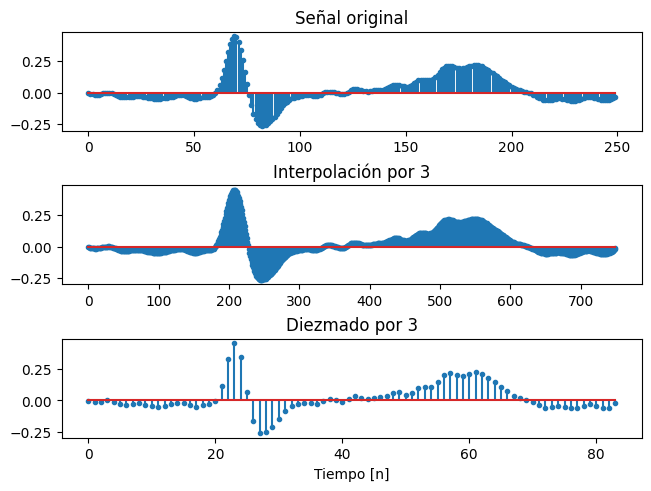

In [1]:
# Ejemplo 11.1. Diezamado e Interpolación en Python.

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

#Carga una señal de ejemplo
senal_ecg = np.load('..\Seccion_4_Transformadas\senal_ecg.npy')
x = senal_ecg[150:400,1]

#Interpolación por factor de 3
xI = sig.resample_poly(x,3,1) 

#Diezmado por factor de 3
xD = sig.resample_poly(x,1,3)

#Grafica los resultados
fig, axs = plt.subplots(3,1, layout='constrained')
axs[0].stem(x, markerfmt='.')
axs[0].set_title('Señal original')
axs[1].stem(xI, markerfmt='.')
axs[1].set_title('Interpolación por 3')
axs[2].stem(xD, markerfmt='.')
axs[2].set_title('Diezmado por 3')
axs[2].set_xlabel('Tiempo [n]')
plt.show()

#### Ejemplo 11.2

En este ejemplo se mostrará como implementar en lenguaje C un interpolador de orden $I=3$ bajo el esquema de procesamiento orientado a bloques.

Primero que todo se debe recordar que un interpolador (o diezmador) de orden I debe estar acompañado de un filtro pasa-bajo de frecuencia de corte $\pi/I$. Para la implementación polifase, lo más conveniente es que la longitud de la respuesta al impulso de dicho filtro sea múltiplo de $I$, por consiguiente, si queremos que cada filtro polifase tenga una longitud de 11 coeficientes, el filtro pasa-bajo se diseñará con $N_{h}=11\times3=33$ coeficientes. El cálculo de los coeficientes del filtro se puede hacer empleando alguna de los métodos descritos en el capítulo de diseño de filtros FIR.

In [ ]:
## Ejemplo 11.2. Diseño de un filtro polifase para interpolación o diezmado
import numpy as np
import scipy.signal as sig

I = 3   #Factor de interpolación
n = np.arange(-16,17)
hn = (1/I)*np.sinc(n/I) * np.hamming(len(n))

#Exporta los coeficientes al archivo coeffs_poly.h
with open('coeffs_poly.h', 'w') as file:
    file.write(f'#define Nh {len(hn)}\n')
    file.write('const float h[] = {\n')
    for hsample in hn:
        file.write(f"\t {hsample}, \n")
    file.write('};\n')
    file.close()

El algoritmo en lenguaje C que calcula el diagrama del interpolador polifase bajo el enfoque orientado a muestras se muestra a continuación.

In [ ]:
void interpolador(
    int lon,    //Longitud de la entrada
    int lh,     //Longitud de la respuesta al impulso del filtro pasa-bajo
    int ID,     //Factor de interpolación
    float *hs,  //Coeficientes de la respuesta al impulso
    float *entrada, //Entrada
    float *salida   //Salida 
) {
    int n, j, k, m;
    float aux;
    m=0;
    for(n=0; n<lon; n++){
        for(j=0; j<ID; j++){
            aux=0.0;
            for (k = 0; k < (lh / ID); k++) {
                aux += entrada[n-k +(lh-1)] * hs[(ID * k) + j];
            }
            salida[m++] = aux;
        }
    }
    for(n=0; n<lh-1; n++){
        entrada[n]= entrada[lon+n];
    }
}

### 11.3.2. Filtros CIC (_Cascaded Integrator-Comb_)

El número de multiplicaciones que involucran los filtros pasa-bajo de frecuencia de corte $\pi /D$ o $\pi /I$, que se usan en conjunto con el interpolador y diezmador, se puede eliminar empleando los filtros CIC (_Cascaded Integrator-Comb_). A diferencia con los filtros polifase, los CIC no permiten personalizar el filtro, en su lugar, la respuesta en frecuencia de estos filtros depende del número de etapas en cascada.

En un CIC se emplea un filtro de peine (_Comb_) en conjunto con un integrador de primer orden como se muestra en la siguiente figura para un diezmador e interpolador. El filtro de peine toma este nombre dado a que su respuesta en frecuencia tiene nulos que dan la apariencia de una forma de peine.

![Diezmador e Interpolador CIC](../img/cap12_cic.png)

El valor de $N$ se escoge típicamente 1 o 2 con el fin de garantizar una frecuencia de corte $\pi /D$ o $\pi /I$. Por otra parte, la respuesta en frecuencia se puede mejorar significativamente añadiendo múltiples etapas en cascada de la estructura básica CIC como se muestra en la siguiente figura para un diezmador.

![Diezmador CIC multietapa](../img/cap12_downsamp_cic.png)

Finalmente, cuando se emplea aritmética en punto fijo, el número de bits del filtro CIC se escoge para ser igual a 

$$nbits = nbits_{x}+\lceil M log_{2}(N R)\rceil$$

donde $R$ es el factor de diezmado o interpolación, $N$ toma el valor de 1 o 2, $M$ es el número de etapas en cascada y $nbits_{x}$ es el número de bits de la señal de entrada. Por ejemplo, si $nbits_{x}=12$, $R=8$, $N=1$ y $M=3$, se deben usar $21$ bits para hacer los cálculos, por lo que simplemente basta con hacer una extensión de signo de 12 a 21 bits a la entrada como se muestra en la siguiente figura. Esta estructura es muy eficiente por lo cual es muy popular en la implementación en hardware de los diezmadores e interpolares.

![Diezmador CIC en punto fijo](../img/cap12_downsamp_cic_fix.png)

#### Para Reflexionar

* Escriba el código en Python de un diezmador e interpolador CIC de tres etapas. 

Puede implementar el integrador y filtro de peine con la función ``sig.lfilter``. Para implementar el diezmador basta con quitar $D$ muestras intermedias, lo cual se puede hacer fácilmente con 

```Python 
m = np.arange(0,len(x),D)
y = x[m]
```

Y para el interpolador puede añadir $I$ ceros intermedios con el código

```Python 
y = np.zeros(len(x)*I)
m = np.arange(0,len(y),I)
y[m] = x
```

Estos principios se emplearon en el siguiente código suministrado a manera de plantilla, el cual debe complementar incluyendo el cálculo del integrador y filtro de peine con la función ``sig.lfilter``.

In [2]:
def integrator(x):
    y = ...  #Ponga su código aquí
    return y

def comb(x):
    y =  ... #Ponga su código aquí
    return y

def decimateCIC(x, D):
    x1 = integrator(x)  #Integrador 1
    x2 = integrator(x1) #Integrador 2
    x3 = integrator(x2) #Integrador 3
    #Diezmador
    m = np.arange(0,len(x3),D)
    y3 = x3[m]
    y2 = comb(y3) #Peine 1
    y1 = comb(y2) #Peine 2
    y  = comb(y1) #Peine 3
    return y

def interpCIC(x, I):
    x1 = comb(x)  #Peine 1
    x2 = comb(x1) #Peine 2
    x3 = comb(x2) #Peine 3
    #Interpolador
    y3 = np.zeros(len(x3)*I)
    m = np.arange(0,len(y3),I)
    y3[m] = x3
    y2 = integrator(y3) #Integrador 1
    y1 = integrator(y2) #Integrador 2
    y  = integrator(y1) #Integrador 3
    return y

Finalmente, pruebe su implementación, usando el siguiente código ejemplo que replica los resultados del Ejemplo 11.1.

In [ ]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

#Carga una señal de ejemplo
senal_ecg = np.load('..\Seccion_4_Transformadas\senal_ecg.npy')
x = senal_ecg[150:400,1]

#Interpolación por factor de 3 usando CIC
xI = interpCIC(x,3,1) 

#Diezmado por factor de 3 usando CIC
xD = decimateCIC(x,3)

#Grafica los resultados
fig, axs = plt.subplots(3,1, layout='constrained')
axs[0].stem(x, markerfmt='.')
axs[0].set_title('Señal original')
axs[1].stem(xI, markerfmt='.')
axs[1].set_title('Interpolación por 3')
axs[2].stem(xD, markerfmt='.')
axs[2].set_title('Diezmado por 3')
axs[2].set_xlabel('Tiempo [n]')
plt.show()

## 11.4 Aplicaciones

Como se comentó al inicio de este capítulo, las estructuras de diezmado e interpolación no solamente son útiles para modificar la tasa de muestreo, sino que permiten también implementar algunas interesantes aplicaciones que se serán abordadas en esta sección. 

### 11.4.1 Cambio de la Frecuencia de Muestreo a un Valor no Entero

Como se mostró anteriormente, el diezmado y la interpolación permiten modificar la tasa de muestreo a un factor entero. Sin embargo, si se quiere modificar la frecuencia de muestreo a un factor no entero, de la forma $f_{out}=f_{in}\frac{I}{D}$, se debe emplear un interpolador y diezmador en cascada. Con el fin de reducir la complejidad de los filtros del interpolador y diezmador que acompañan dichas operaciones, se prefiere combinar ambos filtros en uno solo. En cuyo caso se diseña un único filtro pasa-bajo de frecuencia de corte $$\Omega_{c}=min\left\{ \frac{\pi}{D},\frac{\pi}{I}\right\}$$ como se ilustra en el siguiente diagrama de bloques.

![Diagrama de bloques para cambiar la frecuencia de muestreo](../img/cap12_app_fs_change.png)

Este diagrama está implementado en la función de Python ``sig.resample_poly(x, up, down)`` donde ``up`` y ``down`` son valores enteros que denotan el factor de interpolación y diezmado, respectivamente.

### 11.4.2 Desplazador de Fase no Entera

Es sabido que un elemento de retardo $z^{-k}$ introduce un desplazamiento de la señal de entrada, en un factor de $k$ muestras enteras.Sí se requiere un desplazamiento no entero de la forma $z^{-k/I}$, es posible implementarlo haciendo uso de un interpolador por factor $I$, seguido de un desplazador de fase entera $z^{-k}$, y para regresar a la tasa de muestro original, se aplica un diezmador por el mismo factor $I$. Este esquema, que incluye el filtro antialias en el diezmador, se muestra en la siguiente figura.

![Diagrama de bloques de un desplazador de fase no entera](../img/cap12_app_phase_shift.png)

### 11.4.3 Filtros de Banda Angosta

Una de las principales aplicaciones del procesamiento de tasa múltiple es la implementación de filtros de banda angosta. Como se estudió en el Capítulo 4, el diseño de un filtro FIR de banda angosta requiere un elevado número de coeficientes, lo cual lo hace impráctico de implementar en ciertos sistemas. Dado a que un filtro de banda angosta puede ser el resultado de emplear una alta tasa de muestreo, es viable considerar la reducción de la tasa de muestreo, haciendo uso de diferentes etapas de diezmado como se muestra en la siguiente figura, con el fin de reducir considerablemente el número de operaciones necesarias para implementar el filtro. 

![Diagrama de bloques de un filtro de banda angosta](../img/cap12_app_narrowband_filt.png)

En esta estructura, las etapas de diezmado producen un efecto de magnificación (_zoom-in_) al espectro de entrada, debido al efecto de expansión del espectro, mientras que las etapas de interpolación de salida realizan un efecto de minimización (_zoom-out_), con el fin de comprimir el espectro para regresar a la tasa de muestreo original. Este efecto se explica mejor en la siguiente figura, en la que las etapas de diezmado intermedias han sido escogidas a $D_{1}=3$ y $D_{2}=2$. 

![Espectros en frecuencia en diferentes etapas de un filtro de banda angosta](../img/cap12_app_narrowband_filt_freq.png)

Suponga que el espectro de la señal de entrada es el mostrado en la parte superior de la figura, en color negro, y la respuesta en frecuencia del filtro pasa-banda angosto es el mostrado en color azul. Para la primera etapa de diezmado se requiere un filtro pasa-bajo de frecuencia de corte $\Omega_{1}=\pi/D_{1}=\pi/3$, por lo que después del diezmador, el espectro se ensancha de la forma mostrada en la figura del centro, en color negro. 

Al aplicar una nueva etapa de diezmado se debe emplear un nuevo filtro pasa-bajo de frecuencia de corte $\Omega_{2}=\pi/D_{2}=\pi/2$. El efecto de este filtro es limitar el espectro de entrada como se muestra en la figura intermedia en color rojo. Finalmente, por efecto del diezmador, el espectro a la salida del filtro se ensancha como se muestra en la figura inferior, en color negro.

Nótese que para esta última frecuencia de muestreo, el filtro pasa-banda angosto se puede visualizar como un filtro pasa-banda más ancho (línea en azul). Las especificaciones en frecuencia de este último filtro son las que se consideran para el diseño del filtro de kernel y su longitud es muchísimo más corta que si se hiciera en la frecuencia de muestreo original.

#### Ejemplo 11.3

En este ejemplo veremos como implementar un filtro pasa-banda de frecuencia central 3kHz y ancho de banda 800Hz, para filtrar señales muestreadas a una tasa de muestreo de 100kHz. 

Nótese que sí se diseñara un filtro pasa-banda FIR a la tasa de muestreo de 100kHz, las especificaciones de dicho filtro serían las de un filtro de banda angosta: 

$$\Omega_{c}=2\pi\times3kHz/100kHz=0.06\pi$$
$$\Omega_{BW}=2\pi\times800/100kHz=0.016\pi$$

Inicialmente emplearemos ventana de Kaiser para estimar el número de coeficientes apropiados para realizar el filtrado en una única etapa. Para este caso asumimos un nivel de rizado de $\delta=0.05\%$ y un ancho de la banda de transición de $30Hz$. Con estas especificaciones, empleando las ecuaciones de la ventana de Kaiser, 

$$A=-20log_{10}(\delta)=66dB$$
$$\beta=0.1102(A-8.7)=6.314$$

Dado que $\Delta=30Hz/100kHz=3\times10^{-4}$, tenemos que 

$$N_{h}=\frac{A-7.95}{28.72\Delta}=6737$$

Lo cual es un número elevado de coeficientes para el filtro.

Si asumimos el esquema de filtrado usando varias etapas de diezmado e interpolación, es posible reducir considerablemente el número de coeficientes como veremos a continuación. Al tomar, $D_{1}=3$ y $D_{2}=2$ como se ilustró anteriormente, tenemos que la frecuencia de muestreo para implementar el filtro de kernel será 

$$f_{s}/(D_{1}D_{2})=100kHz/6=16.7kHz$$

Luego, usando las mismas especificaciones para la ventana de Kaiser, el número de coeficientes del filtro de kernel se reduce a $Nh=1123$, dado a que en este caso, $\Delta=30Hz/16.7kHz=0.0018$.

La especificación en frecuencia para diseñar el filtro de kernel será entonces 

$$\Omega_{c}=2\pi\times3kHz/16.7kHz=0.36\pi$$
$$\Omega_{BW}=2\pi\times800Hz/16.7kHz=0.096\pi$$

A continuación se muestra en Python como implementar el filtro empleando la función ``y = sig.resample_poly(x, up, down)`` para implementar en Python el diezmado e interpolación usando la estructura polifase. Para usar dicha función para diezmado se usa ``y = sig.resample_poly(x, 1, D)`` y para interpolación ``y = sig.resample_poly(x, I, 1)``, como se indicó en el Ejemplo 11.1.

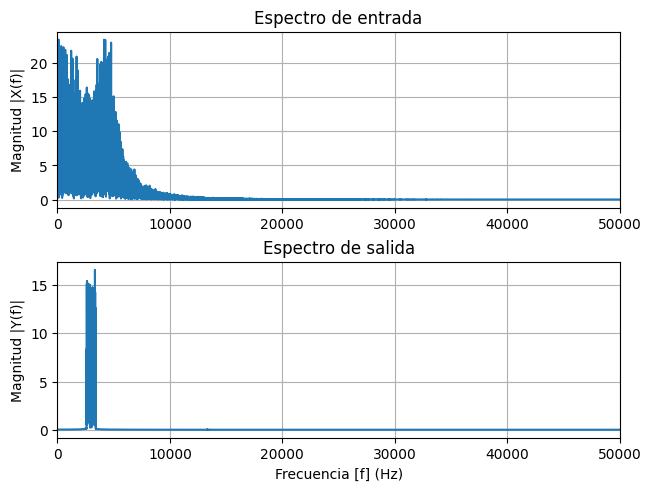

In [ ]:
## Ejemplo 11.3. Implementación de un filtro de banda angosta
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wav
from scipy.fft import fft

# Filtro kernel 
def kernelFilter(x2):
    Nh = 1123
    beta = 6.314 
    Oc = 0.36*np.pi  #Frecuencia central 
    OBW = 0.096*np.pi #Ancho de banda 
    n = np.arange(-(Nh-1)/2, (Nh-1)/2+1) 
    hn = (OBW/np.pi)*np.sinc((OBW/(2*np.pi))*n) * np.cos(n*Oc) * np.kaiser(Nh,beta)
    y2 = sig.lfilter(hn, 1, x2)
    return y2

#Grafica el espectro de la señal de entrada y salida en Hertz
def plotSpectrum(x, y):
    Xk = fft(x)
    y = y[0:len(Xk)]
    Yk = fft(y)
    f  = np.linspace(0,fs,len(Xk)) 
    fig, axs = plt.subplots(2,1,layout='constrained')
    axs[0].plot(f, np.abs(Xk)/len(Xk))
    axs[0].set_title('Espectro de entrada')
    axs[0].set_ylabel(r'Magnitud |X(f)|')
    axs[0].set(xlim=(0,fs/2))
    axs[0].grid()
    axs[1].plot(f, np.abs(Yk)/len(Yk))
    axs[1].set_title('Espectro de salida')
    axs[1].set_xlabel(r'Frecuencia [f] (Hz)')
    axs[1].set_ylabel(r'Magnitud |Y(f)|')
    axs[1].set(xlim=(0,fs/2))
    axs[1].grid()
    plt.show()


# Carga una señal muestreada a 100kHz
fs, x = wav.read("wideband_signal.wav")

# Etapas de diezmado
x1 = sig.resample_poly(x, 1, 3)
x2 = sig.resample_poly(x1, 1, 2)

# Filtro kernel 
y2 = kernelFilter(x2)

# Etapas de interpolación 
y1 = sig.resample_poly(y2, 2, 1) 
y  = sig.resample_poly(y1, 3, 1) 

#Grafica el espectro de la señal de entrada y salida en Hertz
plotSpectrum(x, y)

### 11.4.4 Desplazamiento en Frecuencia a Banda Base

El diezmado requiere un filtro pasa-bajo de frecuencia de corte $\pi/D$ a la entrada con el fin de evitar _aliasing_. Si se relaja esta condición, eliminando dicho filtro o reemplazándolo por un filtro pasa-banda como se muestra en las siguientes figuras, es posible seleccionar un rango específico de frecuencias de entrada y producir un desplazamiento en frecuencia del espectro original. 

![Diagrama de bloques de un demodulador](../img/cap12_app_demod.png)

Estas estructuras son muy utilizadas en radio definido por software (SDR) para implementar sistemas de demodulación a frecuencia base o frecuencias intermedias. La clave para el correcto funcionamiento de esta estructura es que la señal de entrada sea pasa-banda y de banda angosta, y su rango de frecuencia sea múltiplo del factor de diezmado, como se mostrará en el siguiente ejemplo. 

#### Ejemplo 11.4

En este ejemplo se implementará un demodulador de amplitud que permita desplazar el espectro mostrado en la siguiente figura a banda base. 

![Espectros en diferentes puntos del demodulador de amplitud](../img/cap12_app_demod_freq.png)

Dado a que el espectro de entrada es angosto podemos emplear la estructura de desplazamiento en frecuencia empleando un diezmado sin filtro pasa-bajo a la entrada.

Se debe recordar que en el diezmado aparecen réplicas del espectro cada $2\pi k/D$ como muestra la figura del centro. Luego si hacemos coincidir la frecuencia central del espectro de entrada, $\Omega_{c}=5\pi/8$, con dicha ecuación, tenemos que $5\pi/8=2\pi k/D$, lo que nos conduce a que $k=5$ y $D=16$. Esto indica que podemos usar diezmado por $D=16$ para demodular la señal de entrada como se muestra en la figura inferior. 

Nótese que esta estructura solamente funciona sí el ancho de banda de la señal de entrada es menor a $\pi/D$ y la frecuencia central es múltiplo entero de $2\pi/D$.

### 11.4.5 Bancos de Filtros Uniformes

En aplicaciones de análisis de señales o implementación de sistemas de telecomunicaciones, es muy generalizado el uso de banco de filtros uniformes, es decir, filtros en paralelo que extraen la información de una región particular del espectro de entrada. Estos bancos de filtros se pueden implementar eficientemente empleando diezmado en configuración polifase, acompañados de una transformada discreta de Fourier (DFT), como se muestra en la siguiente figura.

![Diagrama de bloques de un banco de filtros uniforme](../img/cap12_app_filterbank.png)

El banco de filtros que permite extraer las diferentes bandas se denomina banco de filtros de análisis (izquierda) y el banco de filtros que mezcla las diferentes bandas para reconstruir el espectro original, se denomina banco de filtros de síntesis (derecha). En las estructuras mostradas en la figura, $h$ es la respuesta al impulso de los filtros polifase obtenidos a partir de un pasa-bajo de frecuencia de corte $\pi/N$, donde $N$ es el número de bandas de descomposición. La demostración matemática de este banco de filtros se deja para consulta en las referencias.

Nótese que en el banco de filtros de análisis, el espectro de la señal de entrada se parte en $N$ bandas uniformes ($N=4$ en este ejemplo), y el rango espectral de cada banda se expande en cada una de las salidas $y_{n}$. El efecto de este banco de filtros, será entonces no solo el análisis de cada banda individual sino que también sirve como un demultiplexor para señales multiplexadas en el frecuencia (FDM: _Frequency-division multiplexing_). 

Por otra parte, el banco de filtros de síntesis, toma $N$ espectros de entrada y los combina ubicando cada espectro de entrada alrededor de una diferente frecuencia central. Es decir, se comporta también como un sistema multiplexor por división en frecuencia FDM.

#### Para Reflexionar

* Realice la implementación en Python de un desplazador de fase no entera.

* Modifique el Ejemplo 11.3 para implementar un cambio de frecuencia de muestreo de la señal de 100kHz a 44100Hz.

* Modifique el Ejemplo 11.3 para sustituir la función ``resample_poly`` por los filtros CIC que se plantearon en el reto indicado en la Sección 11.3.2. Es decir, una vez implemente las funciones ``decimateCIC`` y ``interpCIC``, corra el siguiente código para obtener los mismos resultados del Ejemplo 11.3. ¿Qué ventajas tendría esta modificación?.

In [ ]:
## Filtro de banda angosta usando filtros CIC

# Carga una señal muestreada a 100kHz
fs, x = wav.read("Seccion_7_Tasa_Multiple/wideband_signal.wav")

x = x.astype(np.float32)

# Etapas de diezmado
x1 = decimateCIC(x, 3)
x2 = decimateCIC(x1, 2)

# Filtro kernel 
y2 = kernelFilter(x2)

# Etapas de interpolación 
y1 = interpCIC(y2, 2) 
y  = interpCIC(y1, 3) 

# Grafica el espectro de la señal de entrada y salida en Hertz
plotSpectrum(x, y)



* ¿Cómo implementaría el demodulador del ejemplo de la Sección 11.4.4 usando filtros CIC?

* Una forma simple de hacer un encriptador es partir el espectro de una señal en $N$ segmentos e intercambiar dichas bandas. ¿Cómo construiría este encriptador usando bancos de filtros uniformes? 